###### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

### Load the data

In [2]:
data=pd.read_csv('weather (1).csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
np.unique(data['weather'])

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

''

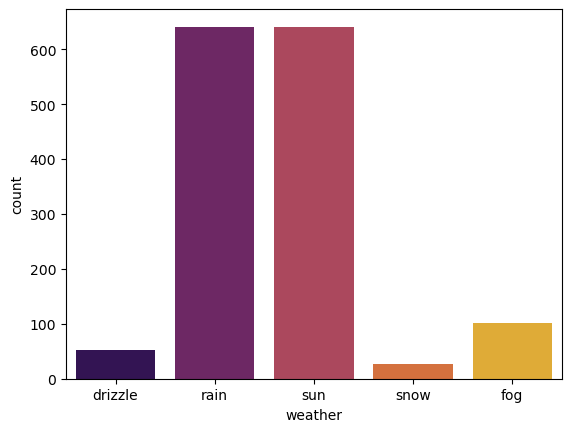

In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot("weather",data=data,palette="inferno")
;

<AxesSubplot:xlabel='wind', ylabel='Count'>

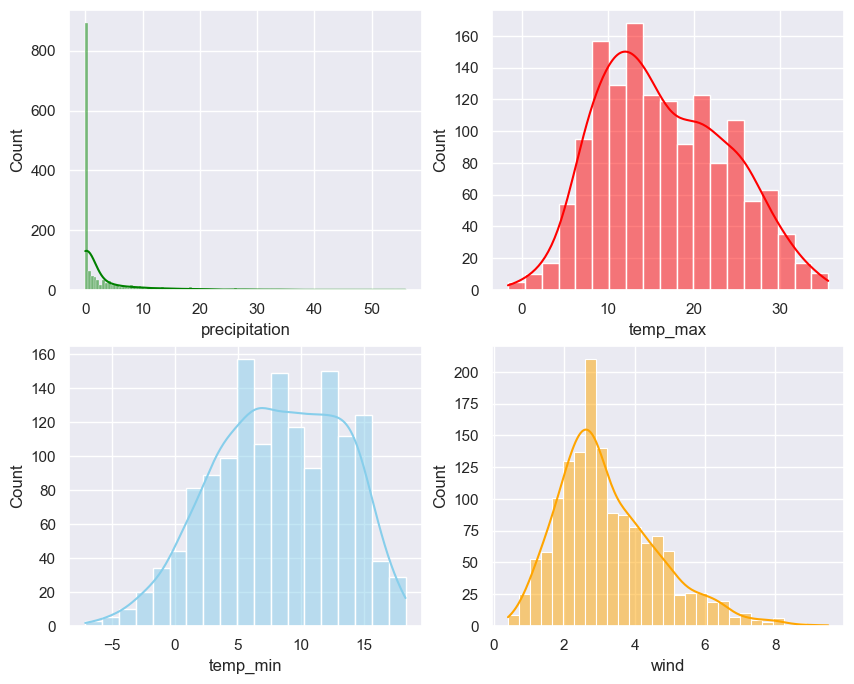

In [5]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

<AxesSubplot:xlabel='precipitation'>

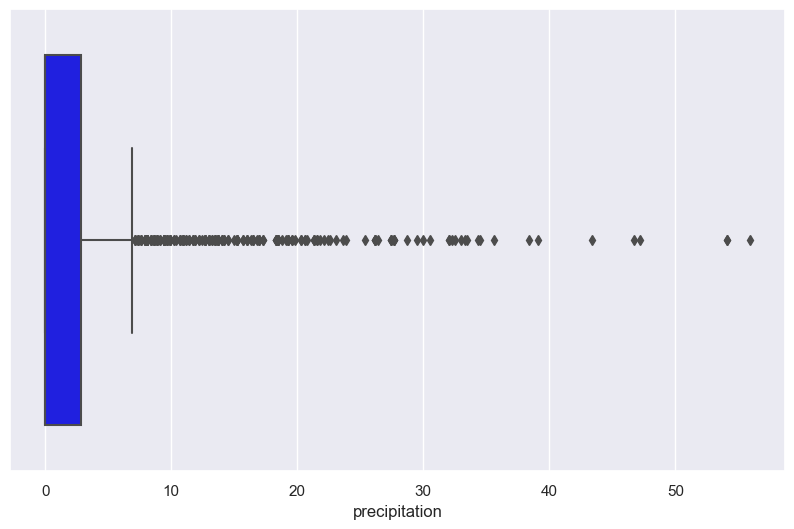

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['precipitation'], color='blue')

<AxesSubplot:xlabel='wind'>

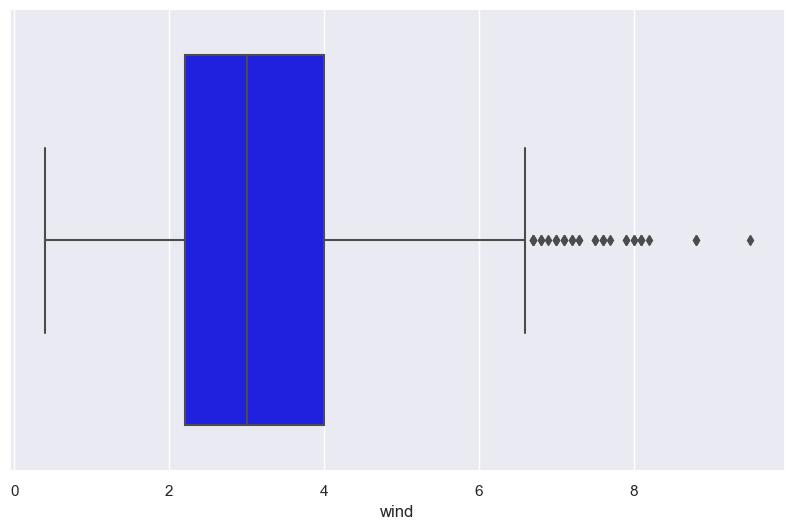

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['wind'], color='blue')

Pearson correlation: -0.22855481643297046


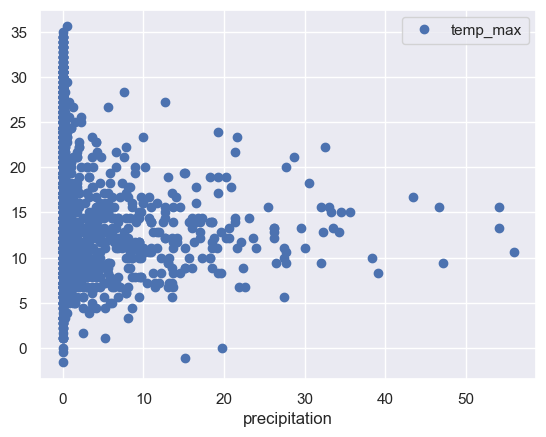

In [8]:
data.plot("precipitation","temp_max",style='o') 
print("Pearson correlation:",data["precipitation"].corr(data["temp_max"]))

Pearson correlation: -0.16485663487495478


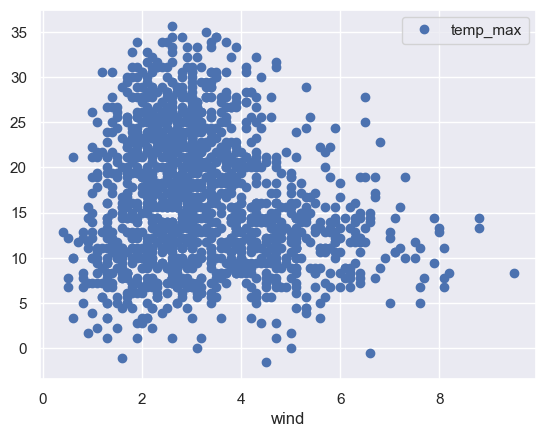

In [9]:
data.plot("wind","temp_max",style='o') 
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))

Pearson correlation: 0.8756866637108165


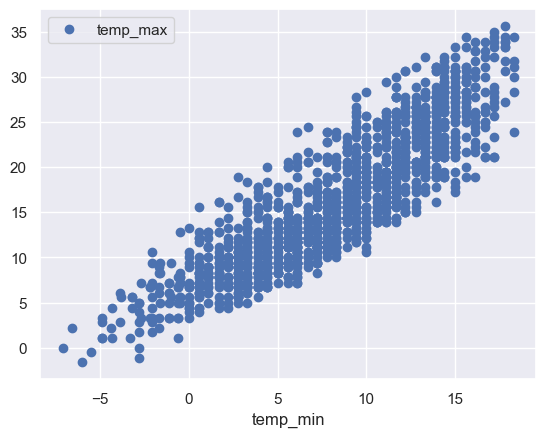

In [10]:
data.plot("temp_min","temp_max",style='o') 
print("Pearson correlation:",data["temp_min"].corr(data["temp_max"]))

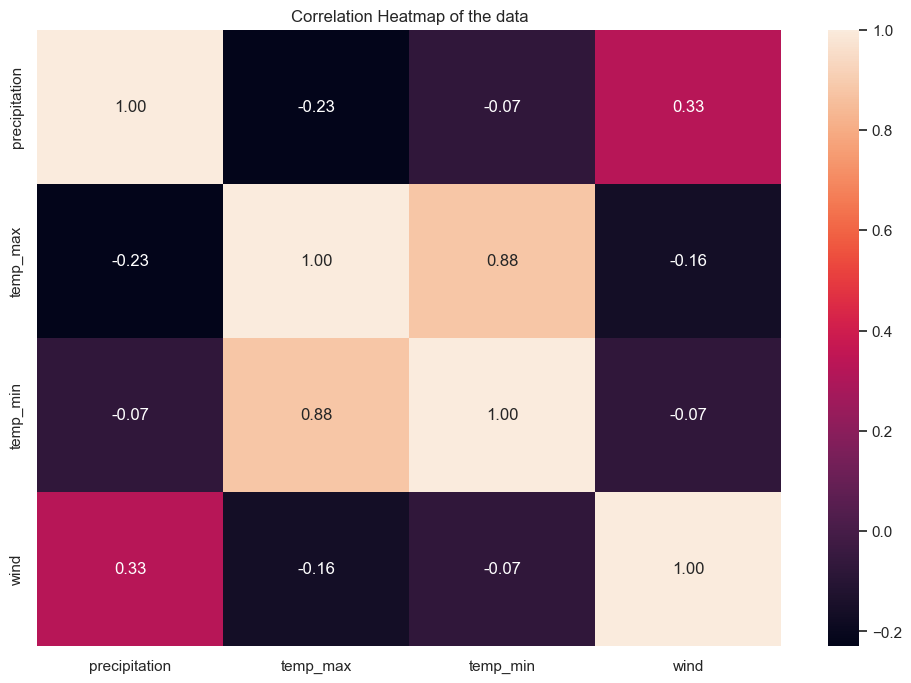

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap of the data')
plt.show()

In [12]:
encoder= OneHotEncoder(sparse=False)

In [13]:
encoded_data = encoder.fit_transform(data[['weather']])

In [14]:
encoded_df = pd.DataFrame(encoded_data , columns = encoder.get_feature_names(['weather']))

In [15]:
data_set=pd.concat([data,encoded_df],axis=1)

In [16]:
data_finish = data_set.drop(columns=['weather'])

In [17]:
data_finish

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,1.0,0.0,0.0,0.0,0.0
1,2012-01-02,10.9,10.6,2.8,4.5,0.0,0.0,1.0,0.0,0.0
2,2012-01-03,0.8,11.7,7.2,2.3,0.0,0.0,1.0,0.0,0.0
3,2012-01-04,20.3,12.2,5.6,4.7,0.0,0.0,1.0,0.0,0.0
4,2012-01-05,1.3,8.9,2.8,6.1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,0.0,0.0,1.0,0.0,0.0
1457,2015-12-28,1.5,5.0,1.7,1.3,0.0,0.0,1.0,0.0,0.0
1458,2015-12-29,0.0,7.2,0.6,2.6,0.0,1.0,0.0,0.0,0.0
1459,2015-12-30,0.0,5.6,-1.0,3.4,0.0,0.0,0.0,0.0,1.0


In [18]:
data_finish['date'] = pd.to_datetime(data_finish['date'])

In [19]:
data_finish = data_finish.set_index('date')

In [20]:
data_finish.apply(pd.isnull).sum()

precipitation      0
temp_max           0
temp_min           0
wind               0
weather_drizzle    0
weather_fog        0
weather_rain       0
weather_snow       0
weather_sun        0
dtype: int64

In [21]:
data_finish.dtypes

precipitation      float64
temp_max           float64
temp_min           float64
wind               float64
weather_drizzle    float64
weather_fog        float64
weather_rain       float64
weather_snow       float64
weather_sun        float64
dtype: object

In [22]:
data_finish.index.year.value_counts().sort_index()

2012    366
2013    365
2014    365
2015    365
Name: date, dtype: int64

In [23]:
x=data_finish[['precipitation', 'temp_max' , 'temp_min' , 'wind']]
x

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9
2015-12-28,1.5,5.0,1.7,1.3
2015-12-29,0.0,7.2,0.6,2.6


In [24]:
y=data_finish.drop(['precipitation', 'temp_max' , 'temp_min' , 'wind'], axis=1)
y

,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,
2012-01-01,1.0,0.0,0.0,0.0,0.0
2012-01-02,0.0,0.0,1.0,0.0,0.0
2012-01-03,0.0,0.0,1.0,0.0,0.0
2012-01-04,0.0,0.0,1.0,0.0,0.0
2012-01-05,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
2015-12-27,0.0,0.0,1.0,0.0,0.0
2015-12-28,0.0,0.0,1.0,0.0,0.0
2015-12-29,0.0,1.0,0.0,0.0,0.0


In [55]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
from sklearn.model_selection import cross_val_score
cross_val_score(ExtraTreeClassifier(),x,y)

array([0.68600683, 0.75342466, 0.70547945, 0.72945205, 0.73630137])

In [57]:
cross_val_score(RidgeClassifier(),x,y)

array([0.59385666, 0.65410959, 0.56849315, 0.62328767, 0.65753425])

In [58]:
cross_val_score(RandomForestClassifier(),x,y)

array([0.75085324, 0.80821918, 0.79452055, 0.80821918, 0.82876712])

In [59]:
cross_val_score(DecisionTreeClassifier(),x,y)

array([0.6894198 , 0.75      , 0.73972603, 0.73972603, 0.77054795])

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  =train_test_split(x, y, test_size=0.2 , random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=4)

In [27]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [28]:
y_predict=model.predict(x_test)
y_predict

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [29]:
#evaluate the model
model.score(x_train, y_train)

0.8613013698630136

In [30]:
model.score(x_test, y_test)

0.8327645051194539

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)*100

83.27645051194538

In [32]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
for i in range(1, 60 ,1):
    print(f'trying model with {i} depth.')
    model=RandomForestClassifier(max_depth=i).fit(x_train, y_train)
    print(f'model accuracy: {model.score(x_test, y_test)*100:.2f}%.')
    print('----------------------------')

trying model with 1 depth.
model accuracy: 82.94%.
----------------------------
trying model with 2 depth.
model accuracy: 82.94%.
----------------------------
trying model with 3 depth.
model accuracy: 83.28%.
----------------------------
trying model with 4 depth.
model accuracy: 82.94%.
----------------------------
trying model with 5 depth.
model accuracy: 83.28%.
----------------------------
trying model with 6 depth.
model accuracy: 83.62%.
----------------------------
trying model with 7 depth.
model accuracy: 83.96%.
----------------------------
trying model with 8 depth.
model accuracy: 83.28%.
----------------------------
trying model with 9 depth.
model accuracy: 82.25%.
----------------------------
trying model with 10 depth.
model accuracy: 81.23%.
----------------------------
trying model with 11 depth.
model accuracy: 81.91%.
----------------------------
trying model with 12 depth.
model accuracy: 81.57%.
----------------------------
trying model with 13 depth.
model acc

In [35]:
for i in range(10, 101 ,10):
    print(f'trying model with {i} n_estimators.')
    model=RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f'model accuracy: {model.score(x_test, y_test)*100:.2f}%.')

trying model with 10 n_estimators.
model accuracy: 75.77%.
trying model with 20 n_estimators.
model accuracy: 77.82%.
trying model with 30 n_estimators.
model accuracy: 77.82%.
trying model with 40 n_estimators.
model accuracy: 79.52%.
trying model with 50 n_estimators.
model accuracy: 78.84%.
trying model with 60 n_estimators.
model accuracy: 78.84%.
trying model with 70 n_estimators.
model accuracy: 80.55%.
trying model with 80 n_estimators.
model accuracy: 79.18%.
trying model with 90 n_estimators.
model accuracy: 79.86%.
trying model with 100 n_estimators.
model accuracy: 80.20%.
